Use the UCI ML Repository to import and save the dataset

In [54]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# print(iris)
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets

# Check the column names in X to verify the correct names
# print(X.columns)
# print(y.columns)

# print(X.head())
# print(y.tail())
  
# # metadata 
# print(iris.metadata) 
  
# # variable information 
# print(iris.variables) 


# Combine X and y into a single DataFrame
data = X.copy()  # Copy features DataFrame to avoid modifying the original
data['Species'] = y  # Add the target column to the combined DataFrame

# Verify the column names to be sure of the names of Sepal Length and Sepal Width
print("Feature columns:", data.columns)


Feature columns: Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Species'],
      dtype='object')


Data Preprocessinng is necessary to encode categorical target variables

In [41]:

# # Taking care of missing data --> Not required for Iris dataset because there are no missing values
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

# Encoding categorical data
# # Encoding the Independent Variable --> Not required all independent varirables are continuous 
# import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# print(X)

# Encoding the Dependent Variable --> Required since dependent variable (class) is categorical 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# print(y)

# Splitting the dataset into the Training set and Test set --> Required for all ML models for validation    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

# # Feature Scaling --> Not required since all features are small continuous numbers around the same range  
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3:] = sc.transform(X_test[:, 3:])
# print(X_train)
# print(X_test)

     sepal length  sepal width  petal length  petal width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[120 rows x 4 columns]
     sepal length  sepal width  petal length  petal width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5    

C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feed the training data into the ML algorithm

1. Logistic Regreesion 

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [43]:
import numpy as np 

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]]


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

# Plotting Iris data in various ways

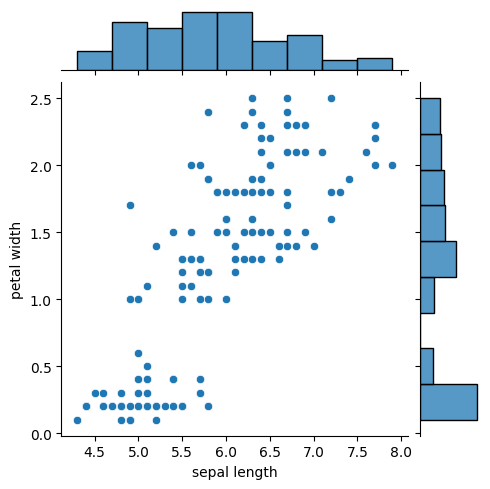

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# The pandas plot extenstion can be used to make a scatterplot
# Display your plot with plt.show

# iris.plot(kind="scatter", x="sepal length", y="sepal width")
# plt.show()

# Use seaborn jointplot, to make bivariate scatterplots and univariate histograms in one graph using the exact column names
sns.jointplot(x=X['sepal length'], y=X['petal width'], data=X, height=5)
plt.show()

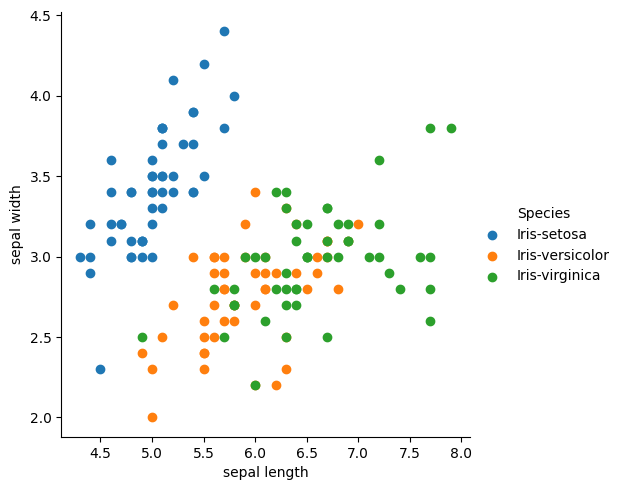

In [56]:

# Now use FacetGrid to create a scatter plot with each species in a different color
sns.FacetGrid(data, hue='Species', height=5) \
   .map(plt.scatter, data.columns[0], data.columns[1]) \
   .add_legend()

plt.show()

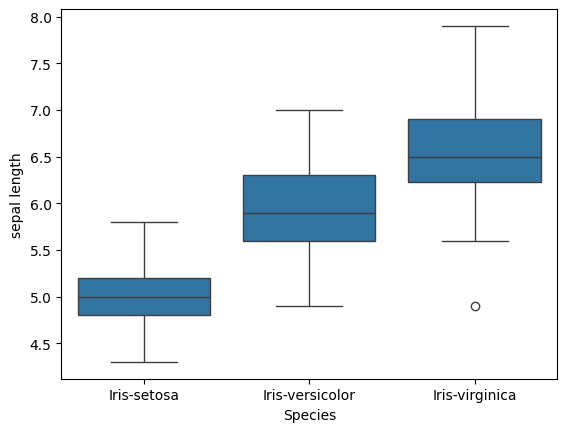

In [58]:
# To plot the species data using a box plot:

sns.boxplot(x=data["Species"], y=data['sepal length'], data=data )
plt.show()

C:\Users\Davide\AppData\Local\Temp\ipykernel_20320\3042028867.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax= sns.stripplot(x=data["Species"], y=data['sepal length'], data=data, jitter=True, edgecolor="gray")


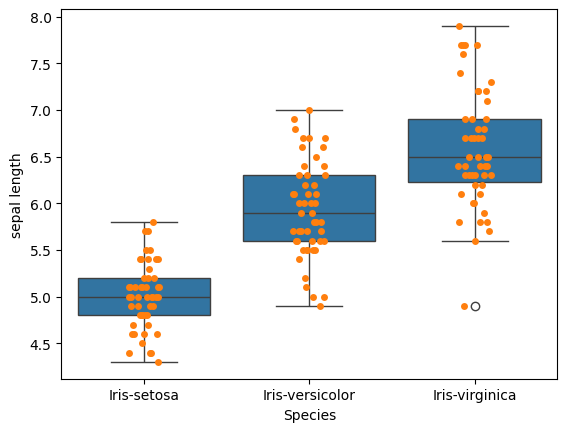

In [60]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x=data["Species"], y=data['sepal length'], data=data)
ax= sns.stripplot(x=data["Species"], y=data['sepal length'], data=data, jitter=True, edgecolor="gray")
plt.show()

C:\Users\Davide\AppData\Local\Temp\ipykernel_20320\1472081306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Species'], y=data['petal length'], data=data, palette={"blue","red","yellow"})


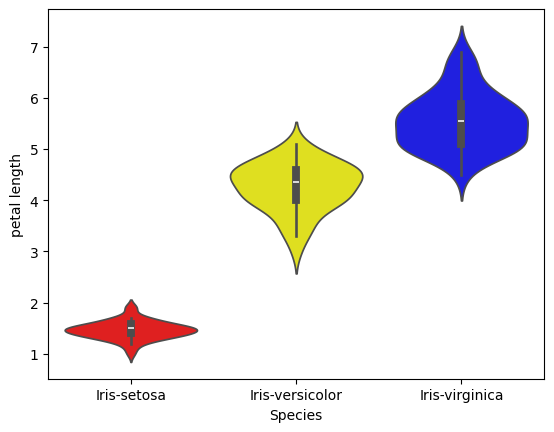

In [67]:
# A violin plot shows the density of the data, simularly to a scatter plot,
#and presents catagorical data like a box plot.
# Denser regions of the data are fatter.
sns.violinplot(x=data['Species'], y=data['petal length'], data=data, palette={"blue","red","yellow"})
plt.show()

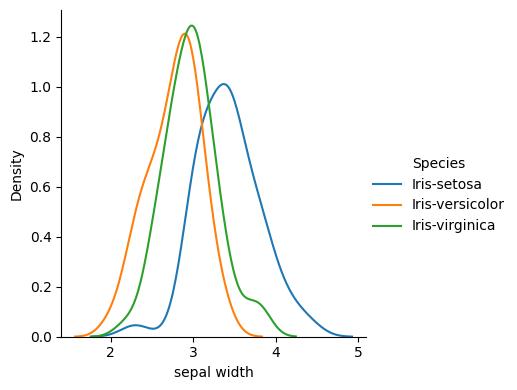

In [74]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(data, hue='Species', height=4) \
   .map(sns.kdeplot,data.columns[1]) \
   .add_legend()
plt.show()

C:\Users\Davide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


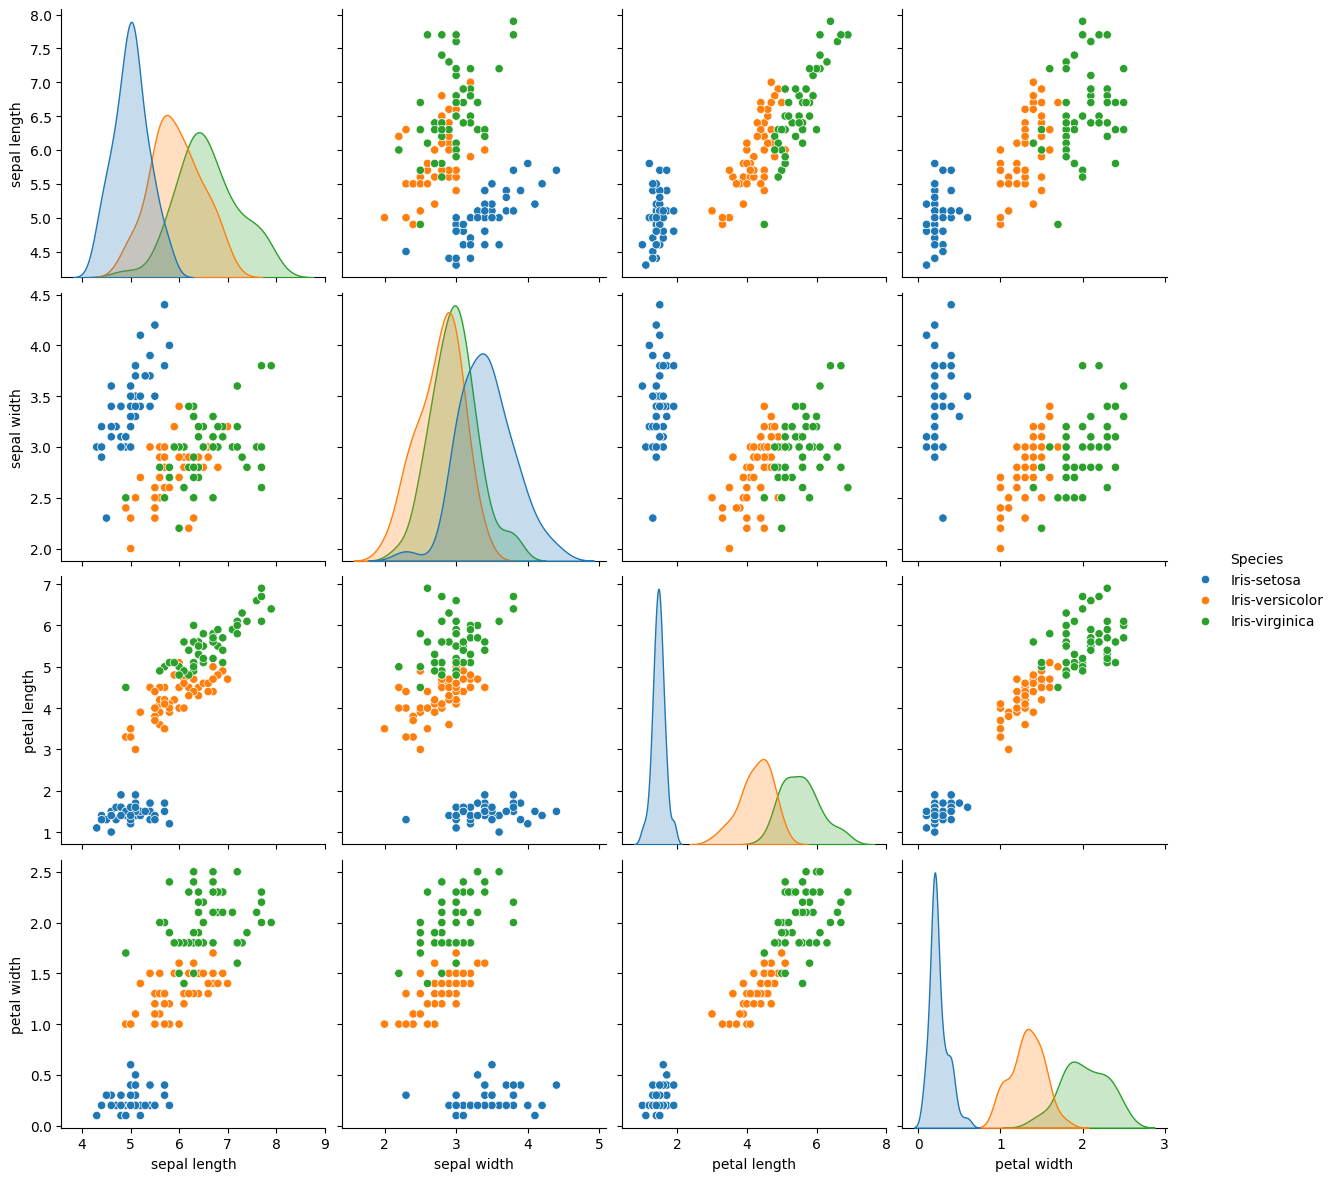

In [76]:
#Use pairplot to analyze the relationship between species for all characteristic combinations. 
# An observable trend shows a close relationship between two of the species

sns.pairplot(data, hue="Species", size=3)
plt.show()

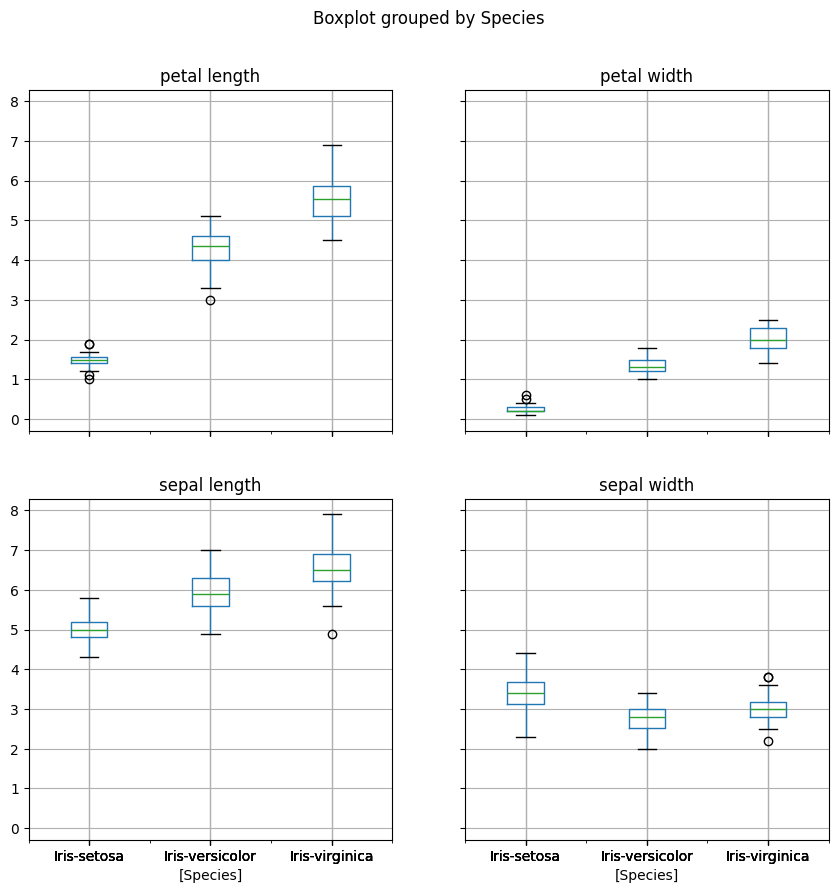

In [77]:
# To make a Pandas boxplot grouped by species, use .boxplot
#Modify the figsize, by placing a value in the X and Y cordinates
data.boxplot(by="Species", figsize=(10, 10))
plt.show()

In [78]:
#In Pandas use Andrews Curves to plot and visualize data structure.
#Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
#This useful for detecting outliers in times series data.
#Use colormap to change the color of the curves

from pandas.tools.plotting import andrews_curves
andrews_curves(data, "Species",colormap='rainbow')
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'